In [3]:
import pandas as pd
import sys
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
datadir = "/media/sf_VBox_Shared/London/accelerometer_5second/merged/"
path_to_file5sec = os.path.join(datadir, "__016563_2014-08-08 12-02-19.bin_day1.csv")

In [5]:
filenames = os.listdir(datadir)
datasets = [pd.read_csv(os.path.join(datadir,fn)) for fn in filenames if os.path.isfile(os.path.join(datadir,fn))]
print(len(datasets))

21


In [6]:
for i in range(len(datasets)):
    datasets[i] = datasets[i].set_index('timestamp')
    datasets[i].index = pd.to_datetime(datasets[i].index) 
    datasets[i]['Activity'] = [str(a) for a in datasets[i]['Activity']]

In [12]:
all_acceleration = np.array([s for d in datasets for s in list(np.array(d['acceleration']))])
print all_acceleration.shape

(362872,)


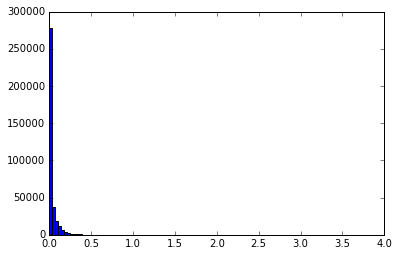

In [14]:
plt.hist(all_acceleration, bins=100)
plt.show()

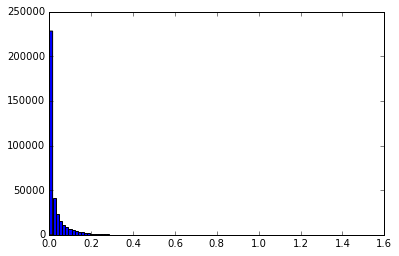

In [16]:
log_acceleration =  np.log(all_acceleration+1)
plt.hist(log_acceleration, bins=100)
plt.show()

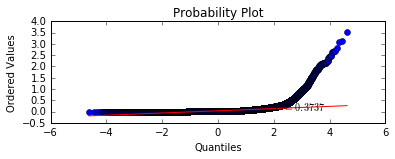

In [20]:
from scipy import stats
fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(all_acceleration, dist=stats.norm, plot=ax1)
plt.show()

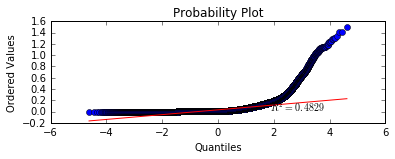

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(log_acceleration, dist=stats.norm, plot=ax1)
plt.show()

## Box-Cox

In [ ]:
bc_acceleration, bc_lmbda = stats.boxcox(all_acceleration+1)

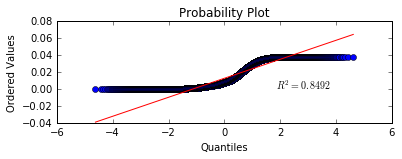

In [29]:
fig = plt.figure()
ax2 = fig.add_subplot(211)
stats.probplot(bc_acceleration, dist=stats.norm, plot=ax2)
plt.show()

In [25]:
bc_lmbda

-26.168144345203963

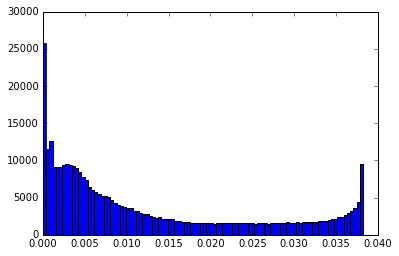

In [30]:
log_acceleration =  np.log(all_acceleration+1)
plt.hist(bc_acceleration, bins=100)
plt.show()